<a href="https://colab.research.google.com/github/vishnusathwik/srishti_23/blob/main/SRISHTI'23_Tutorial_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SRISHTI'23 - Tutorial 06**
# Linear Classifiers and Perceptron Algorithm
### Lab Coordinator: Shantanu Agrawal

In this lab, we will be studying the use of linear classifiers, followed by using perceptron learning algorithm.

**Linear classifiers** can be understood as form of **classifiers** (which will classify things into two different output categories) and we are doing this by **involving a linear equation**.

## Let's understood how line can classify datapoints using an example:<br>
Given a line as G(X), where X are values of different features given in (d+1)-dimensioanl vector form:<br>
$G(X) = w^TX = 6x_1 + 3x_2 - 12$<br>
(Here, d=2 and w = [6,3,-12], we are assuming the augmented version of w or coefficient vector)

Let's make a toy dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([[1,2,1]])

import random
for i in range(10):
  x_1 = random.randint(0,3)
  x_2 = random.randint(0,5)
  X = np.asarray([[x_1, x_2, 1]]) # adding bias term at the end for augmented version of X as well
  points = np.append(points, X, axis=0)

print(points)

[[1 2 1]
 [1 5 1]
 [3 4 1]
 [0 0 1]
 [1 0 1]
 [3 0 1]
 [3 0 1]
 [1 3 1]
 [1 4 1]
 [1 4 1]
 [1 4 1]]


In [ ]:
# We have w or coefficients vector as
w = np.asarray([6,3,-12])

In [ ]:
# Now let's do the linear classification
# we do it by checking the value of G(X)

def linClassification(w, points):
  for point in points:
    gx = 0
    for i in range(len(w)):
      gx+=w[i]*point[i]
    if gx < 0:
      plt.scatter(point[0], point[1], s=120, marker='_', linewidths=2)
    elif gx > 0:
      plt.scatter(point[0], point[1], s=120, marker='+', linewidths=2)
    else:
      plt.scatter(point[0], point[1], s=120, marker='o', linewidths=2)

def linClassification_VectorialForm(w, points):
  for point in points:
    gx = np.sum(w*point)
    if gx < 0:
      plt.scatter(point[0], point[1], s=120, marker='_', linewidths=2)
    elif gx > 0:
      plt.scatter(point[0], point[1], s=120, marker='+', linewidths=2)
    else:
      plt.scatter(point[0], point[1], s=120, marker='o', linewidths=2)

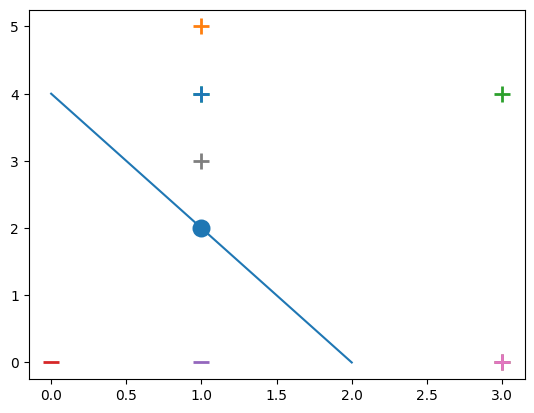

In [ ]:
# Lets first plot the line using axis intercepts
plt.plot([2,0], [0,4])

linClassification(w, points)
plt.show()

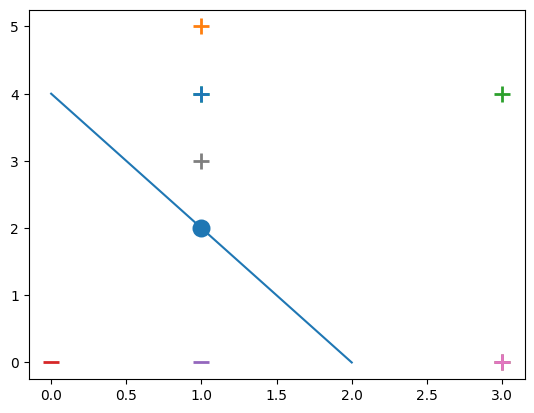

In [ ]:
# Now let's check what happens if we do it vector from

# First plot the line using axis intercepts
plt.plot([2,0], [0,4])

linClassification_VectorialForm(w, points)
plt.show()

So, we can see that how line can classify the data points. And we understand how it is done. But how do we get to know the correct line which would stand as our answer for the dataset.

So, to get the required line, we will try to understand various Linear Classifiers.

### First we have Perceptron Update algorithm to find the required line

We can now code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set.

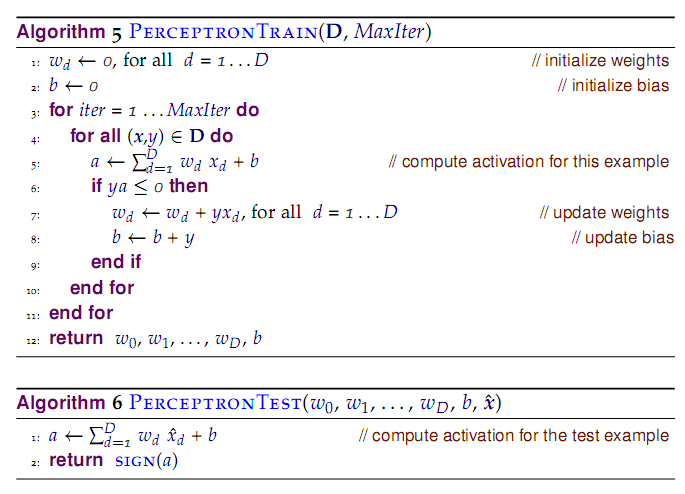

By checking **$y.a <= 0$**, misclassifed data-points have been checked and update is being done accordingly.

For larger data sets it makes sense, to randomly pick a sample during each iteration in the for-loop(s) (i.e, **Batch Perceptron Update**).

The below mentioned algorithm is shown in the above image.

In [ ]:
# Creating the labeled dataset for the example simulation of above shown algorithm
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

Y = np.array([-1, -1, 1, 1, 1])


In [ ]:
def perceptron_algo(X, Y,eta):
    # random line is being called to start the algorithm
    w = np.zeros(len(X[0]))
    #eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [ ]:
# Let's analyse the algorithm against number of iterations needed
def perceptron_algo_plot(X, Y,eta):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    #eta = 1
    n = 30
    errors = []
    misclassified_points = []
    avg_error = []

    for t in range(n):
        total_error = 0
        number = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                number += 1
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)
        misclassified_points.append(number)
        if number==0:
          avg_error.append(number)
        else:
          avg_error.append((total_error * -1)/number)

    plt.plot(misclassified_points, label ='Number of misclassified points')
    plt.plot(errors, label ='Error caused by misclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    plt.plot(misclassified_points, label ='Number of misclassified points')
    plt.plot(avg_error, label ='Average Error caused by misclassified points')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Analysis')
    plt.legend()
    plt.show()

    return w

Next, we will see the the training error at each epoch.

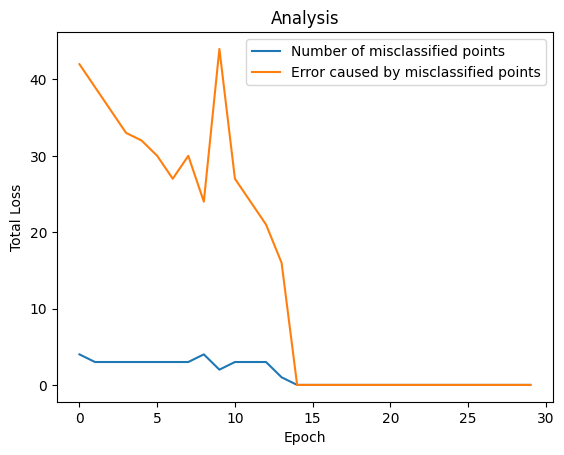

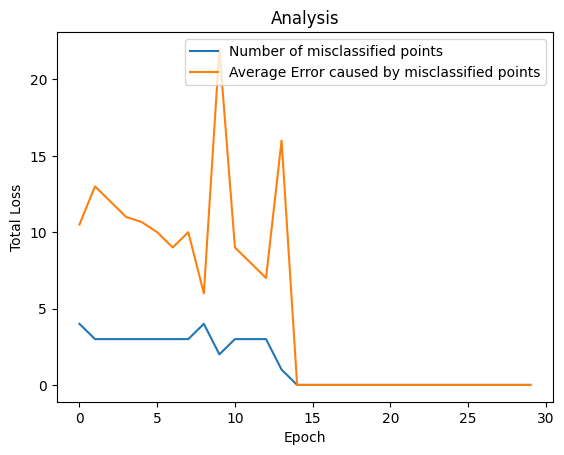

In [ ]:
w = perceptron_algo_plot(X, Y,1)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

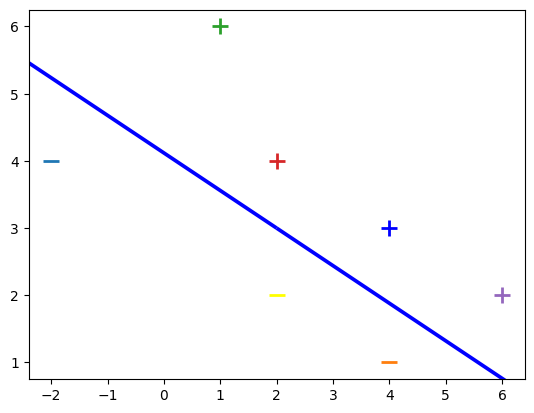

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   In our case eta or the learning rate is equal to 1. Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3.   Also try to understand what is happening analytically, if you are increasing or decreasing the learning rate, how it can be helpful to you?
    - [Understanding Learning Rates and How It Improves Performance in Deep Learning](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10). Try to get the gist of the blog, would be more clearer in the later part of the course.
5.   Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.
    - [Solving XOR with a single Perceptron](https://medium.com/@lucaspereira0612/solving-xor-with-a-single-perceptron-34539f395182).
6.   Perceptron algorithm trains the model in the manner such that it **just** answers the question according to the training data but does not give the most optimal answer, in the manner that it does not maximizes the seperability from both the classes and thus have a chance of not doing well in validation or testing data. How will you try to solve this problem? Note your observation.
    - [Perceptron vs SVM: a quick comparison](https://medium.com/@subashkharel/perceptron-vs-svm-a-quick-comparison-6b5d6b5d64f). Try to read more such Medim or TowardsDataScience articles for understanding more about Machine Learning.
7.   Can this method or some extension on this be used for classifying more than two classes at once. Note your observations.

**Question 1.Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.**

In [ ]:
#link to dataset --> https://datahub.io/machine-learning/sonar%23resource-sonar#data
import pandas as pd
df = pd.read_csv("sonar_csv.csv")

In [ ]:
df['Class'].unique()

array(['Rock', 'Mine'], dtype=object)

In [ ]:
for i in range(0,len(df['Class'])):
  if df["Class"][i] == 'Rock':
    df["Class"][i] = -1
  elif df["Class"][i] == 'Mine':
    df["Class"][i] = 1

<ipython-input-55-afc21759f1ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Class"][i] = -1
<ipython-input-55-afc21759f1ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Class"][i] = 1


In [ ]:
y = np.array(df['Class'])

cols = []
for i in range(1,61):
  cols.append('attribute_'+str(i))

x = df[cols].values

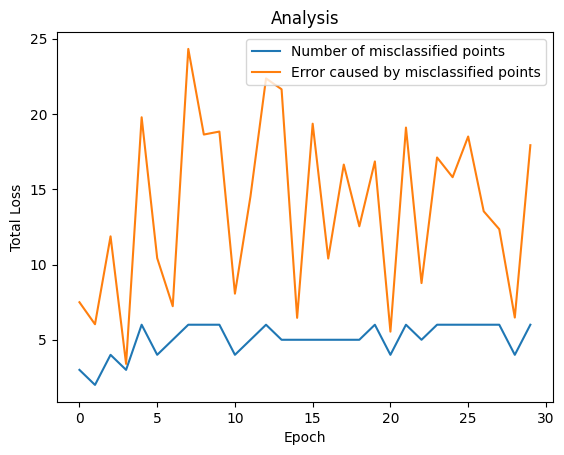

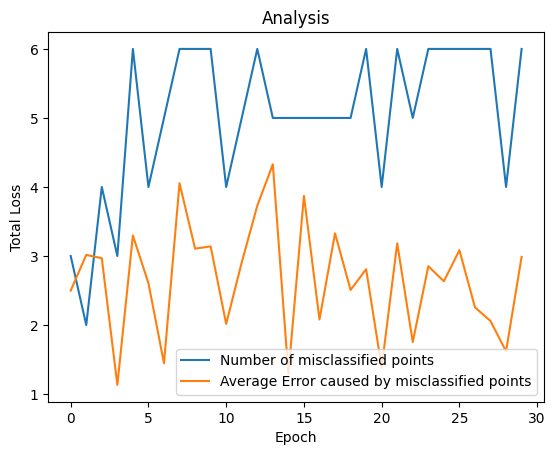

In [ ]:
w = perceptron_algo_plot(x, y,1)

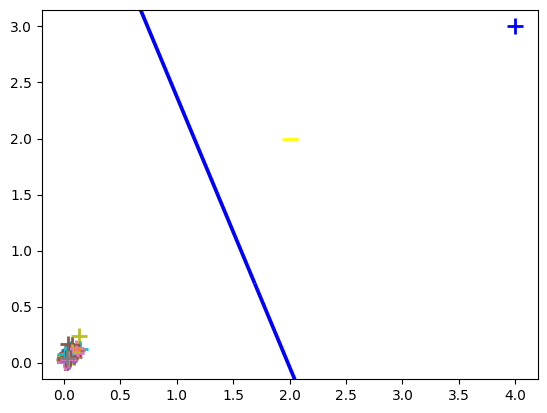

In [ ]:
for d, sample in enumerate(x):
  # Plot the negative samples
  if d < 2:
    plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
  # Plot the positive samples
  else:
    plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

**Question 2: Increase/decrease the learning rate to see how many iterations it takes to converge**

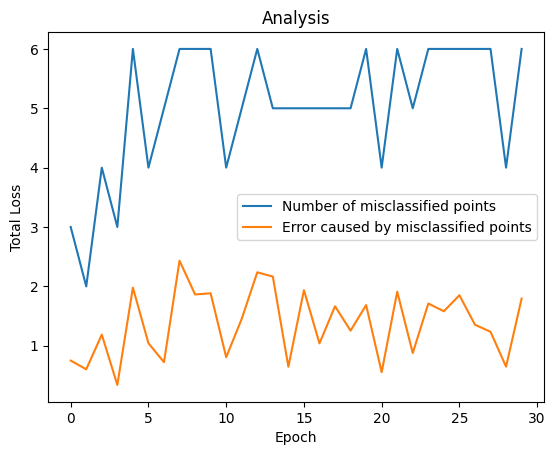

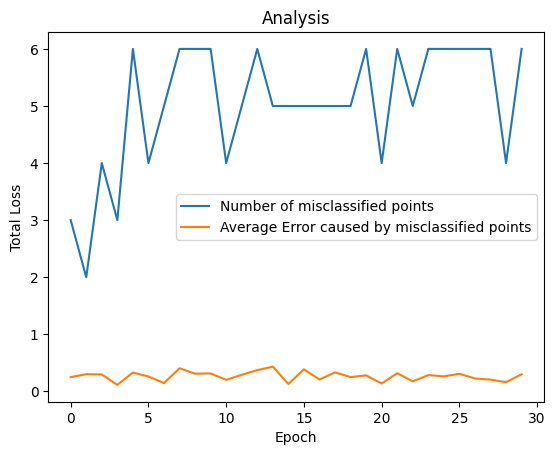

In [ ]:
w2 = perceptron_algo_plot(x, y,0.1)

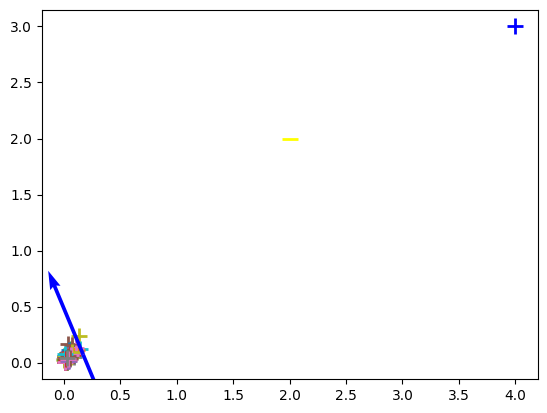

In [ ]:
for d, sample in enumerate(x):
  # Plot the negative samples
  if d < 2:
    plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
  # Plot the positive samples
  else:
    plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w2[0], w2[1], -w2[1], w2[0]]
x3 = [w2[0], w2[1], w2[1], -w2[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

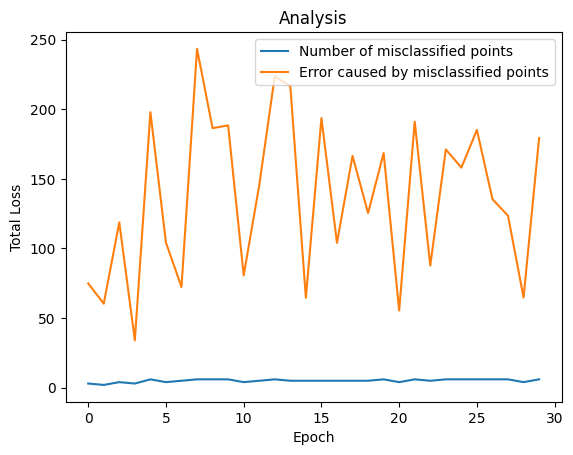

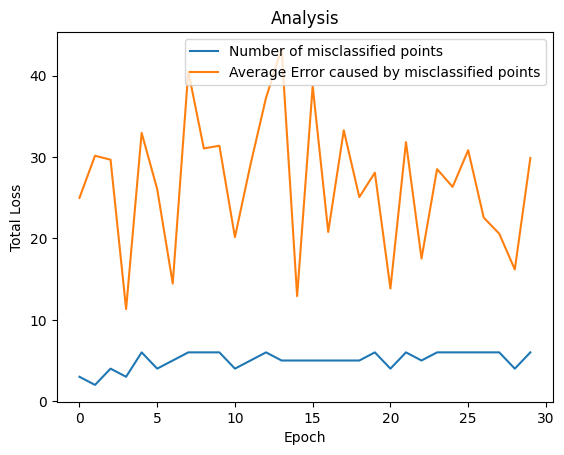

In [ ]:
w3 = perceptron_algo_plot(x, y,10)

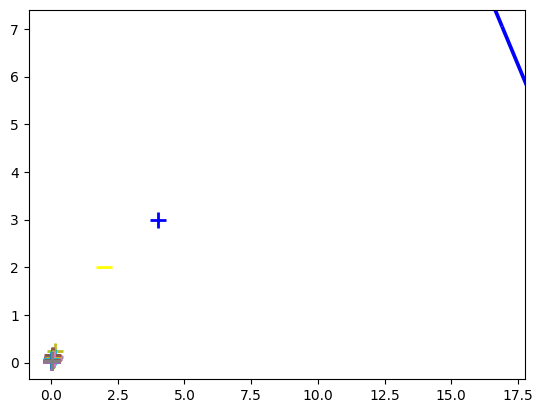

In [ ]:
for d, sample in enumerate(x):
  # Plot the negative samples
  if d < 2:
    plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
  # Plot the positive samples
  else:
    plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w3[0], w3[1], -w3[1], w3[0]]
x3 = [w3[0], w3[1], w3[1], -w3[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

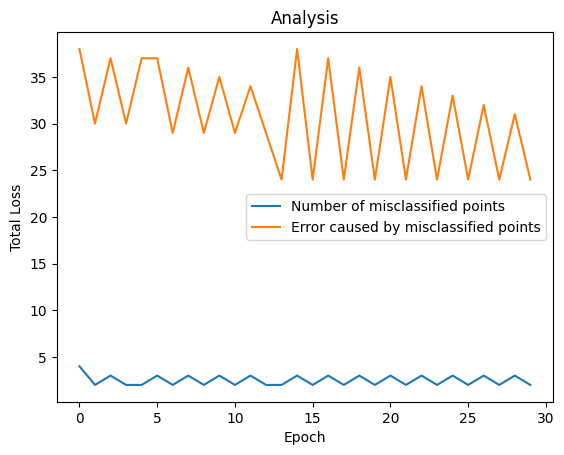

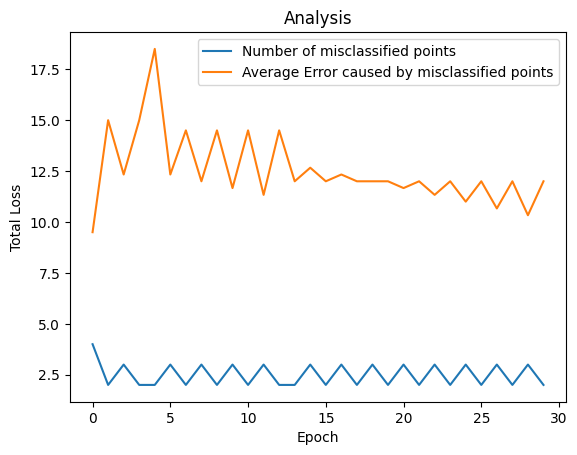

[-2.  3. 15.]


In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

**Question 3.Also try to understand what is happening analytically, if you are increasing or decreasing the learning rate, how it can be helpful to you?**

The learning rate is a hyperparameter that determines the step size at which a model updates its parameters during training. Increasing the learning rate can lead to faster convergence and shorter training times, which is beneficial when dealing with large datasets or when a model needs to learn quickly. However, a high learning rate can also result in overshooting the optimal solution, leading to unstable training and poor generalization performance. On the other hand, decreasing the learning rate allows for more accurate convergence and better overall solutions, but it can slow down the training process and potentially trap the model in local minima. Selecting an appropriate learning rate requires experimentation and tuning, and techniques like learning rate schedules and adaptive methods can be used to strike a balance between convergence speed and stability. Ultimately, finding the right learning rate is crucial for effectively training deep learning models.

**Question 4.Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.**

In [2]:
import numpy as np

X = np.array([[1, 2], [3, 4], [2, 1], [5, 6], [4, 3], [6, 5]])
y = np.array([-1, -1, -1, 1, 1, 1])

weights = np.random.rand(X.shape[1])
bias = np.random.rand()

learning_rate = 0.1

def perceptron(X, y, weights, bias, learning_rate, epochs):
    for epoch in range(epochs):
        for i in range(len(X)):
            activation = np.dot(X[i], weights) + bias
            if activation >= 0:
                y_pred = 1
            else:
                y_pred = -1
            if y_pred != y[i]:
                weights += learning_rate * y[i] * X[i]
                bias += learning_rate * y[i]

    return weights, bias

epochs = 100

trained_weights, trained_bias = perceptron(X, y, weights, bias, learning_rate, epochs)

print("Trained Weights:", trained_weights)
print("Trained Bias:", trained_bias)


Trained Weights: [ 0.43315046 -0.21671181]
Trained Bias: -0.6864349566692715


**Question 5.Perceptron algorithm trains the model in the manner such that it just answers the question according to the training data but does not give the most optimal answer, in the manner that it does not maximizes the seperability from both the classes and thus have a chance of not doing well in validation or testing data. How will you try to solve this problem? Note your observation.**


The perceptron algorithm, being a linear classifier, may not provide the most optimal separation between classes, leading to potential issues when applied to validation or testing data. To overcome this problem, several approaches can be employed. Firstly, non-linear transformations can be applied to the features, allowing the model to capture more complex relationships. Techniques like polynomial features or kernel methods can help in this regard. Secondly, utilizing more advanced models such as support vector machines, decision trees, random forests, or neural networks can enable the model to learn more complex decision boundaries and improve performance on non-linearly separable datasets. These models have a higher capacity to handle complex patterns and generalize better to unseen data. Additionally, regularization techniques like L1 or L2 regularization can be used to control model complexity and prevent overfitting. By penalizing large weights, regularization helps the model focus on important features and reduces the tendency to fit noise in the training data. Furthermore, employing cross-validation techniques can assess the model's performance on validation or testing data, guide the selection of hyperparameters, and ensure its generalization ability. By incorporating these strategies, we can overcome the limitations of the perceptron algorithm and enhance the model's performance on unseen data.

**Question 6.Can this method or some extension on this be used for classifying more than two classes at once. Note your observations.**

The perceptron algorithm can be extended to handle multi-class classification tasks using various approaches. One popular method is the One-vs-All (OvA) approach, where a separate binary classifier is trained for each class. During training, the data points from a particular class are labeled as positive (+1) while the remaining classes are labeled as negative (-1). This results in a set of binary classifiers, and during prediction, the class with the highest activation is assigned as the predicted class. Although this approach is straightforward and easy to implement, it can suffer from imbalanced class distributions and potentially produce ambiguous decision boundaries in regions where multiple classes overlap.

Another approach is the One-vs-One (OvO) strategy, where a binary classifier is trained for each pair of classes. For N classes, N * (N-1) / 2 binary classifiers are created. During training, each classifier learns to differentiate between a specific pair of classes. During prediction, each binary classifier casts a vote for the class it predicts, and the class with the most votes is assigned as the predicted class. OvO can handle imbalanced class distributions more effectively than OvA and can potentially result in clearer decision boundaries between classes. However, it requires training a larger number of classifiers, making it computationally more expensive as the number of classes increases.